In [2]:
%load_ext autoreload
%autoreload 2

import math
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
import numpy as np
import pandas as pd
import matplotlib.transforms as transforms


from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import datetime
import statsmodels

# Local Modules
import sys
import os.path
sys.path.insert(0, os.path.abspath('/scratch/horta/coronawiki/'))
from helpers.load import load_interventions, load_aggregated, load_topics
from helpers.vars import codes, helper_langs, interventions_helper, topics, codes
from helpers.plot import set_size, plot_dates, plot_interventions
from helpers.topics import order_topics, colors_z, get_df_pageviews_topics
from helpers.diffs_n_diffs import get_standard_error_sum
from dateutil.relativedelta import relativedelta

In [3]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# fontpath = os.path.expanduser('~/LinLibertine_DRah.ttf')
# prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
#     'font.family': 'Linux Libertine Display',
    'text.usetex': False
}

mpl.rcParams.update(params)

In [4]:
interventions = load_interventions("../data/interventions.csv")
topics_df, topics = load_topics('../data/topics_linked.csv.xz')
agg = load_aggregated("../data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
time_int = 35

In [5]:
topics_df.head()

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q5465542


In [12]:
# df = pd.DataFrame.from_dict(agg)
# df.head()
topics

['Culture.Biography.Biography*',
 'Culture.Biography.Women',
 'Culture.Food and drink',
 'Culture.Internet culture',
 'Culture.Linguistics',
 'Culture.Literature',
 'Culture.Media.Books',
 'Culture.Media.Entertainment',
 'Culture.Media.Films',
 'Culture.Media.Media*',
 'Culture.Media.Music',
 'Culture.Media.Radio',
 'Culture.Media.Software',
 'Culture.Media.Television',
 'Culture.Media.Video games',
 'Culture.Performing arts',
 'Culture.Philosophy and religion',
 'Culture.Sports',
 'Culture.Visual arts.Architecture',
 'Culture.Visual arts.Comics and Anime',
 'Culture.Visual arts.Fashion',
 'Culture.Visual arts.Visual arts*',
 'Geography.Geographical',
 'Geography.Regions.Africa.Africa*',
 'Geography.Regions.Africa.Central Africa',
 'Geography.Regions.Africa.Eastern Africa',
 'Geography.Regions.Africa.Northern Africa',
 'Geography.Regions.Africa.Southern Africa',
 'Geography.Regions.Africa.Western Africa',
 'Geography.Regions.Americas.Central America',
 'Geography.Regions.Americas.North

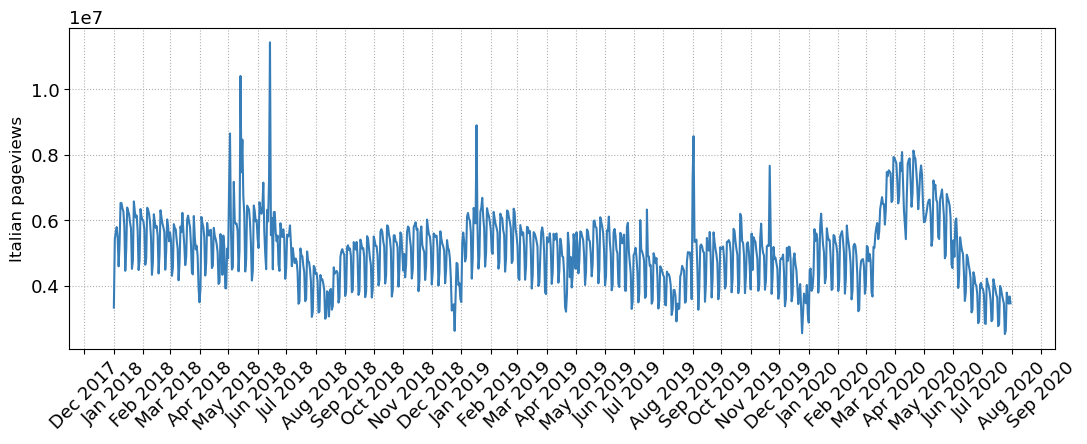

In [6]:
import matplotlib.dates as mdates
italy = agg['it']['sum']
# italy = italy[(italy.index.year == 2020) & (italy.index.month <= 12) & (italy.index.month >= 1)]
fig = plt.figure(constrained_layout=False, figsize=(28,10))
gs = fig.add_gridspec(2, 2, hspace=0.4)
ax = fig.add_subplot(gs[0, 0])

ax.plot(italy.index , italy.values, color="#377eb8", zorder=9)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45)

ax.set_ylabel("Italian pageviews")

ax.grid(ls=":")

In [126]:
agg.keys()

dict_keys(['ja.m', 'it', 'da.m', 'tr', 'no.m', 'en', 'sr', 'tr.m', 'en.m', 'no', 'sv', 'nl.m', 'nl', 'da', 'de', 'fr.m', 'ca.m', 'de.m', 'ko.m', 'fi.m', 'sr.m', 'ja', 'fr', 'fi', 'ca', 'it.m', 'sv.m', 'ko'])

Dominant frequencies in the dataset and the amplitude is their power:

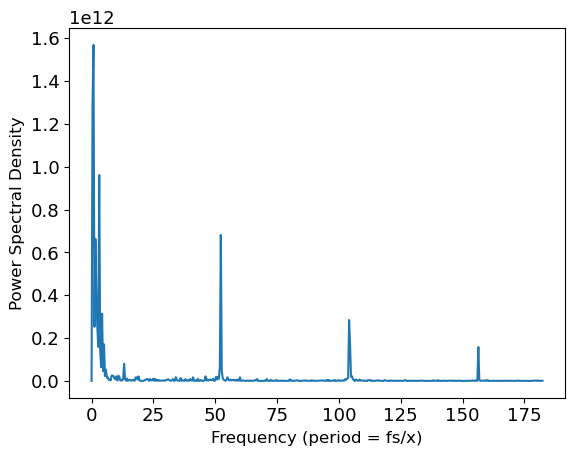

In [7]:
from scipy.signal import periodogram

italy = agg['it.m']['sum']
numeric_values = italy.values 

freq, spectrum = periodogram(numeric_values, fs=365)
plt.plot(freq,spectrum)
plt.xlabel('Frequency (period = fs/x)')
plt.ylabel('Power Spectral Density')
plt.show()

# There are some weekly patterns -> peak at fs/52 = 7: weekly peak

Calculate the number of times each topic has been consulted (over the whole time period):

In [8]:
def sum_topics(datadict, country):
    topics_country = datadict[country]['topics']
    
    sums_list = []
    
    for i, topic in enumerate(topics):
        topic_data = topics_country[topics[i]]['sum']
        topic_values = topic_data.values
        total_sum = np.sum(topic_values)
        sums_list.append((topics[i], total_sum))
        total_sum = 0
        
    return sums_list

Plots of the 'popularity' of each topic for specific countries:

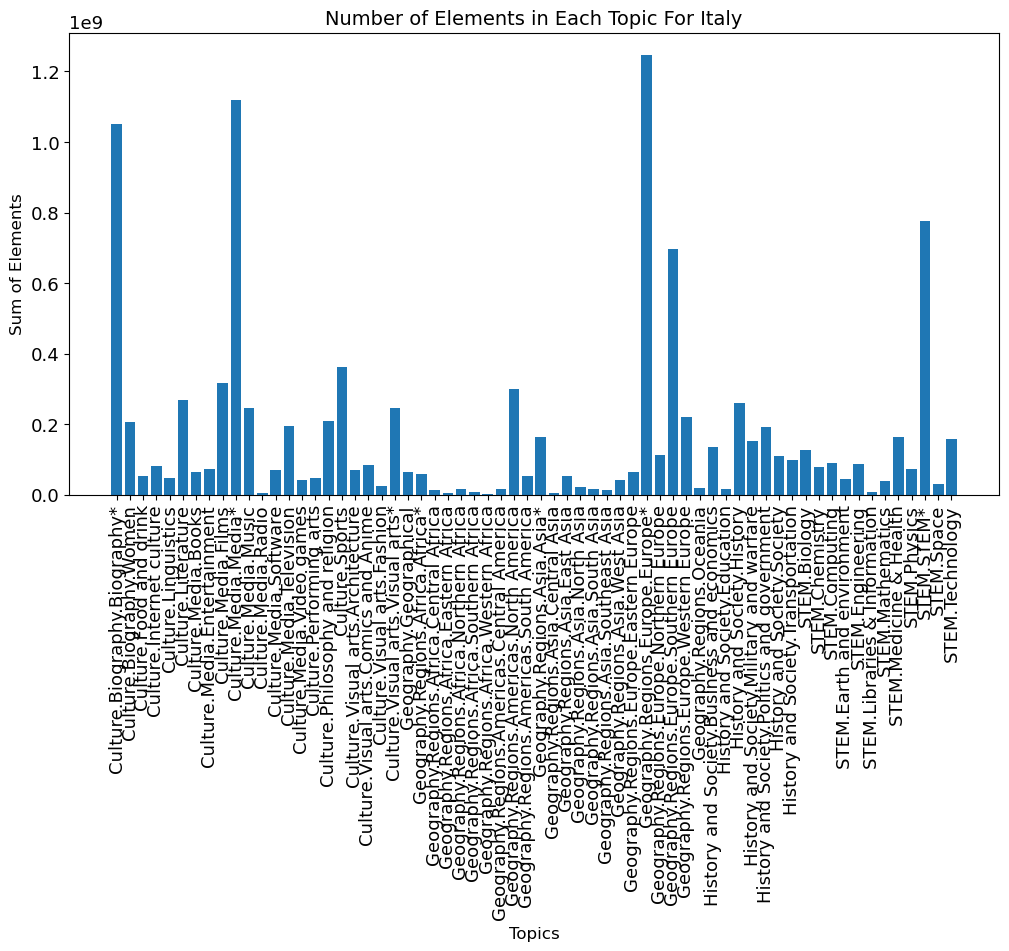

In [9]:
sums_list = sum_topics(agg, 'it')

topics = [item[0] for item in sums_list]
sums = [item[1] for item in sums_list]

plt.figure(figsize=(12, 6))
plt.bar(topics, sums)
plt.xticks(rotation=90)
plt.xlabel('Topics')
plt.ylabel('Sum of Elements')
plt.title('Number of Elements in Each Topic For Italy')
plt.show()

[('Culture.Biography.Biography*', 318124933), ('Culture.Biography.Women', 63147129), ('Culture.Food and drink', 33752051), ('Culture.Internet culture', 24007855), ('Culture.Linguistics', 24851190), ('Culture.Literature', 56971184), ('Culture.Media.Books', 13818274), ('Culture.Media.Entertainment', 15492228), ('Culture.Media.Films', 40295092), ('Culture.Media.Media*', 243792516), ('Culture.Media.Music', 80791377), ('Culture.Media.Radio', 2567981), ('Culture.Media.Software', 25871800), ('Culture.Media.Television', 31357840), ('Culture.Media.Video games', 8894416), ('Culture.Performing arts', 10580166), ('Culture.Philosophy and religion', 76361784), ('Culture.Sports', 105410096), ('Culture.Visual arts.Architecture', 23741130), ('Culture.Visual arts.Comics and Anime', 8743869), ('Culture.Visual arts.Fashion', 8665443), ('Culture.Visual arts.Visual arts*', 62554491), ('Geography.Geographical', 38087741), ('Geography.Regions.Africa.Africa*', 28498480), ('Geography.Regions.Africa.Central Afri

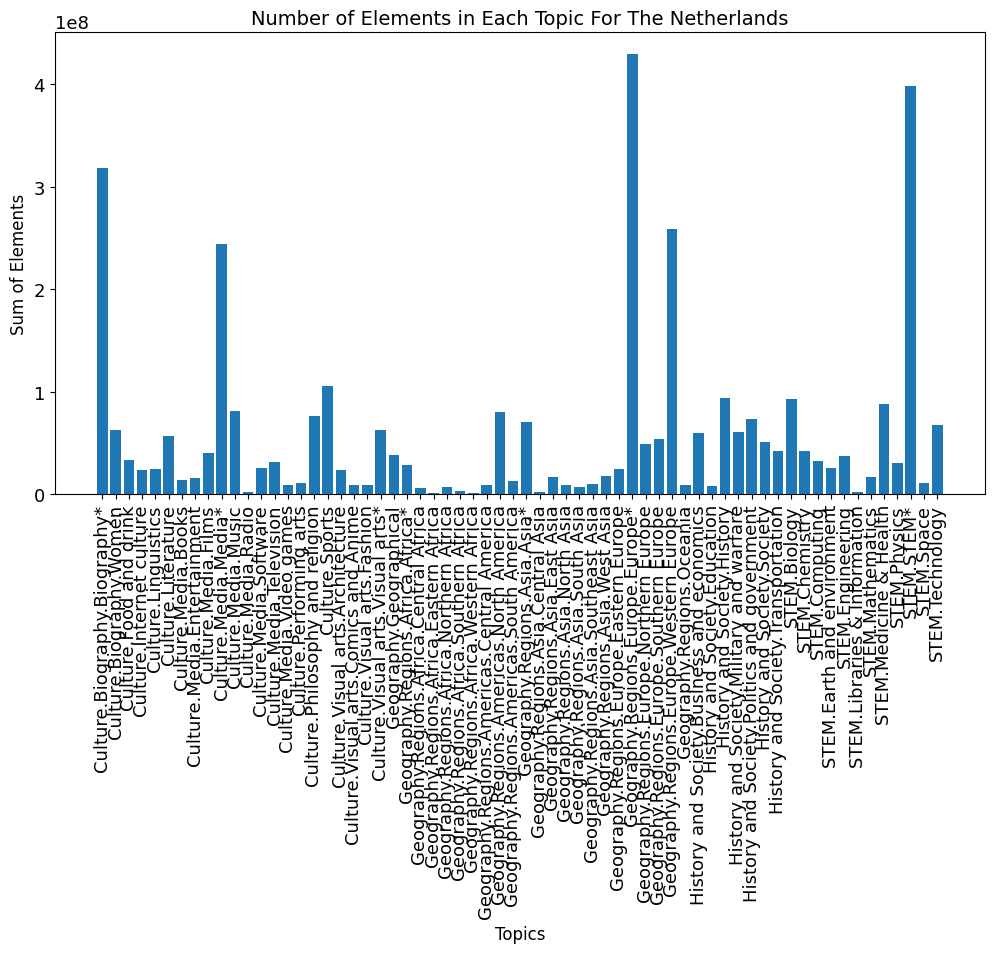

In [13]:
sums_list = sum_topics(agg, 'nl')

print(sums_list)

topics = [item[0] for item in sums_list]
sums = [item[1] for item in sums_list]

plt.figure(figsize=(12, 6))
plt.bar(topics, sums)
plt.xticks(rotation=90)
plt.xlabel('Topics')
plt.ylabel('Sum of Elements')
plt.title('Number of Elements in Each Topic For The Netherlands')
plt.show()

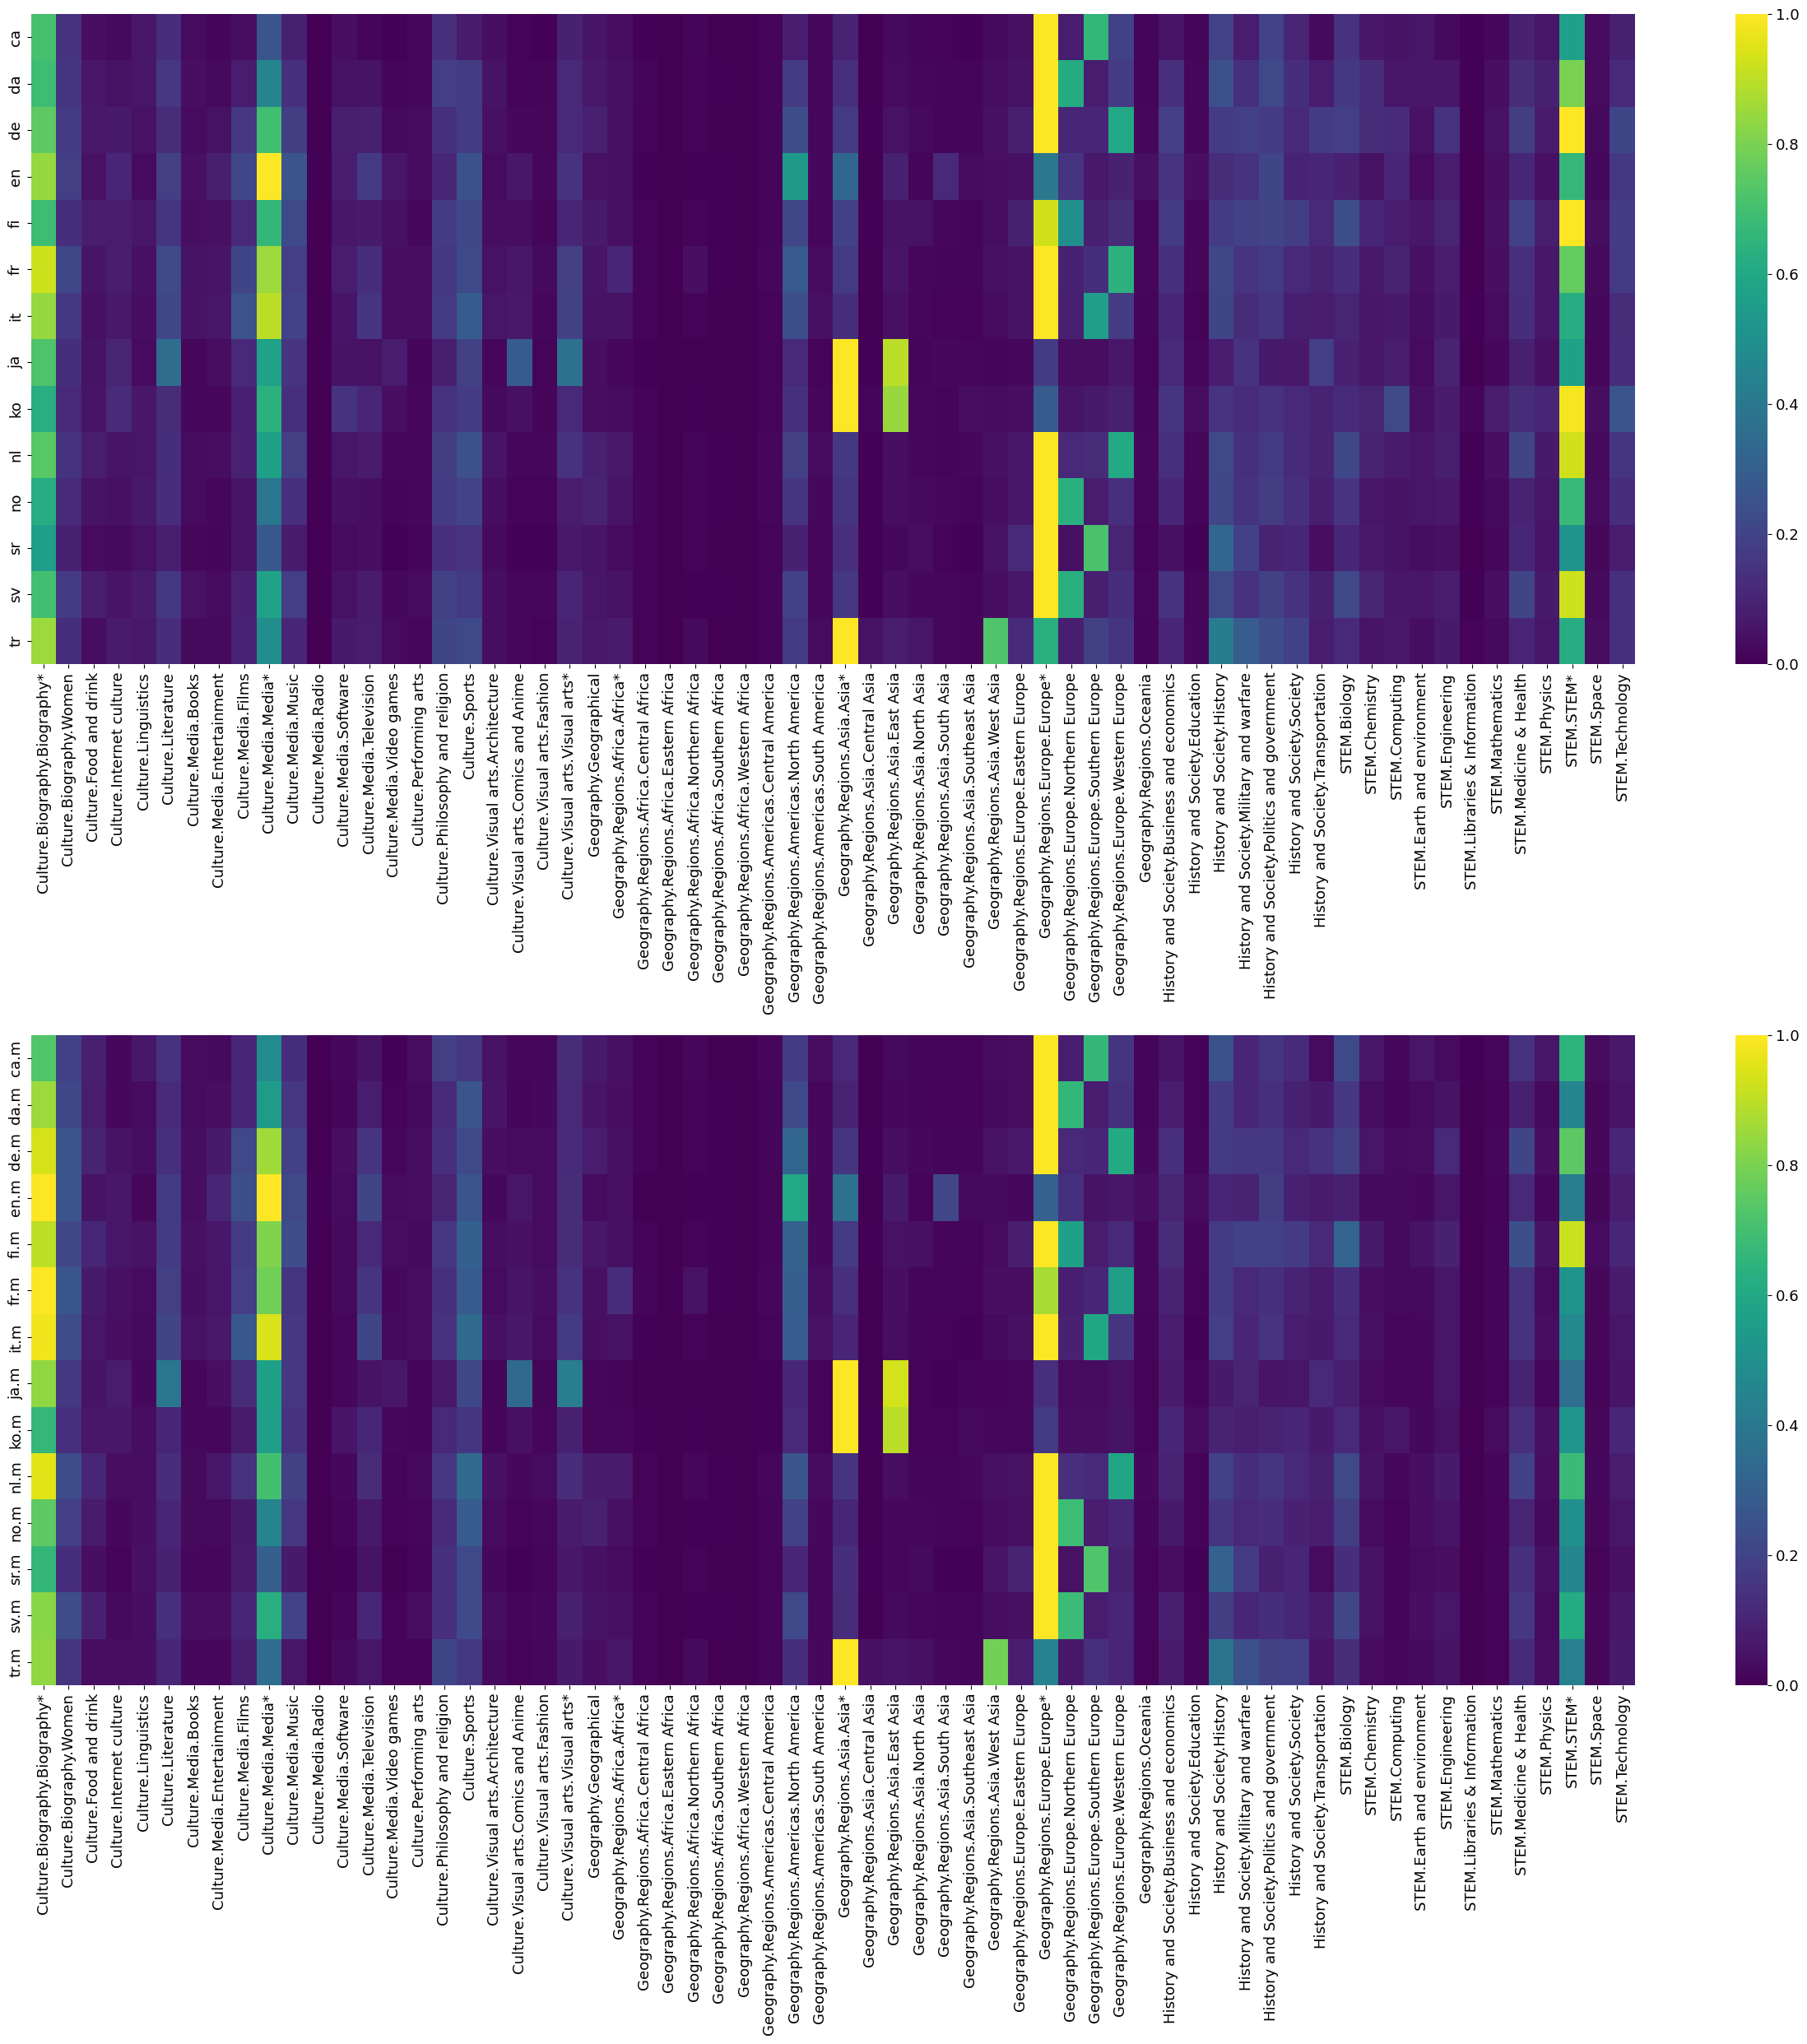

In [70]:
# Heatmap to show countries against topics chart
from sklearn.preprocessing import MinMaxScaler

topics_dict = {}
for key in agg:
    topics_dict[key] = {}
    for topic in agg[key]['topics']:
        topics_dict[key][topic] = agg[key]['topics'][topic]['sum'].sum()
        
df = pd.DataFrame.from_dict(topics_dict)
# df = df / df.sum()
# MinMax normalisation
df = (df - df.min()) / (df.max() - df.min())
mob = sorted([x for x in df.columns if x[-2:] == '.m'])
pc = sorted([x for x in df.columns if x[-2:] != '.m'])
df_mobile = df.filter(items=mob, axis=1)
df_pc = df.filter(items=pc, axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25, 25))
sns.heatmap(df_pc.T, cmap='viridis', annot=False, ax=ax1)
sns.heatmap(df_mobile.T, cmap='viridis', annot=False, ax=ax2)
fig.tight_layout()

,ja.m,da.m,no.m,tr.m,en.m,nl.m,fr.m,ca.m,de.m,ko.m,fi.m,sr.m,it.m,sv.m
len,1197788,256451,516838,345790,6045654,1621578,2188967,610575,2407385,489181,480638,396063,1588312,1959446
sum,2018-01-01 22328288 2018-01-02 22278953 ...,2018-01-01 765123 2018-01-02 443384 2018...,2018-01-01 715031 2018-01-02 536506 20...,2018-01-01 493684 2018-01-02 483443 20...,2018-01-01 135822131 2018-01-02 12708735...,2018-01-01 3331046 2018-01-02 2494738 20...,2018-01-01 13167585 2018-01-02 12184735 ...,2018-01-01 169499 2018-01-02 149404 2018...,2018-01-01 20345709 2018-01-02 15585298 ...,2018-01-01 1484496 2018-01-02 1248031 20...,2018-01-01 1319053 2018-01-02 1094280 20...,2018-01-01 451383 2018-01-02 462824 20...,2018-01-01 12856884 2018-01-02 12887390 ...,2018-01-01 2383474 2018-01-02 1873096 20...
covid,"{'len': 30, 'sum': [55, 55, 51, 46, 70, 77, 73...","{'len': 4, 'sum': [0, 2, 1, 0, 0, 2, 0, 1, 5, ...","{'len': 10, 'sum': [7, 5, 2, 2, 2, 0, 3, 2, 7,...","{'len': 64, 'sum': [3, 2, 2, 9, 2, 2, 1, 4, 6,...","{'len': 306, 'sum': [911, 1006, 919, 1026, 978...","{'len': 32, 'sum': [19, 18, 16, 14, 15, 18, 10...","{'len': 16, 'sum': [116, 105, 98, 104, 114, 10...","{'len': 49, 'sum': [3, 2, 4, 1, 10, 1, 3, 5, 5...","{'len': 77, 'sum': [233, 189, 142, 226, 220, 2...","{'len': 113, 'sum': [6, 5, 8, 8, 10, 2, 7, 7, ...","{'len': 9, 'sum': [0, 0, 8, 0, 0, 2, 0, 3, 1, ...","{'len': 9, 'sum': [11, 20, 15, 30, 33, 17, 31,...","{'len': 33, 'sum': [139, 187, 162, 180, 127, 1...","{'len': 8, 'sum': [19, 12, 13, 14, 11, 15, 12,..."
topics,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 57720...,{'Culture.Biography.Biography*': {'len': 11603...,{'Culture.Biography.Biography*': {'len': 70434...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 15284...,{'Culture.Biography.Biography*': {'len': 38254...,{'Culture.Biography.Biography*': {'len': 99190...,{'Culture.Biography.Biography*': {'len': 36663...,{'Culture.Biography.Biography*': {'len': 75406...,{'Culture.Biography.Biography*': {'len': 10422...,{'Culture.Biography.Biography*': {'len': 37580...,{'Culture.Biography.Biography*': {'len': 29422...,{'Culture.Biography.Biography*': {'len': 14668...
